In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import oneHotEncoder
from NeuralNetwork import NeuralNetwork

%matplotlib inline

### Load data and One-Hot-Encode

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw2train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw2dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw2eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel, 9)
devLabel = oneHotEncoder(devLabel, 9)
evalLabel = oneHotEncoder(evalLabel, 9)

In [3]:
print(trainFeature.shape, devFeature.shape, evalFeature.shape)

(5060, 1120) (731, 1120) (909, 1120)


In [4]:
# Universial Hyper-parameters
batchSize = 200

### Relu non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04878 s
Reach the maximum iteration	 89.57 s
At 434 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.445256916996
Development Accuracy:	 0.367989056088
Evaluation Accuracy:	 0.344334433443


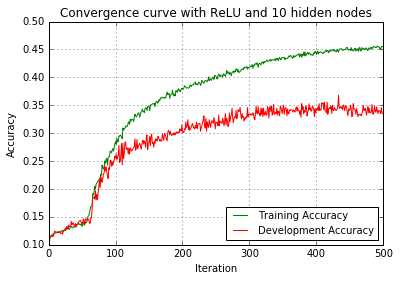

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.02328 s
Reach the maximum iteration	 85.29 s
At 499 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.597233201581
Development Accuracy:	 0.414500683995
Evaluation Accuracy:	 0.391639163916


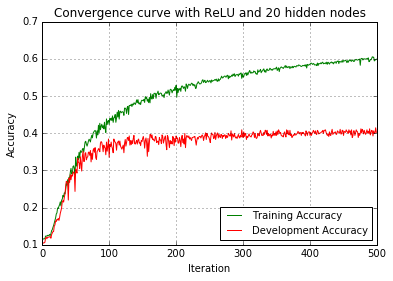

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00485 s
Reach the maximum iteration	 72.29 s
At 455 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.367786561265
Development Accuracy:	 0.321477428181
Evaluation Accuracy:	 0.344334433443


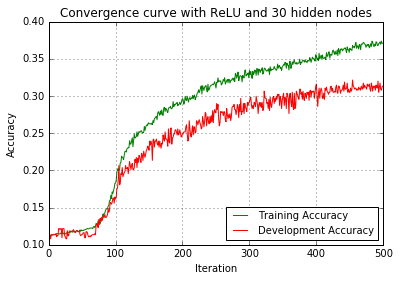

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00461 s
Reach the maximum iteration	 69.16 s
At 473 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.384584980237
Development Accuracy:	 0.285909712722
Evaluation Accuracy:	 0.278327832783


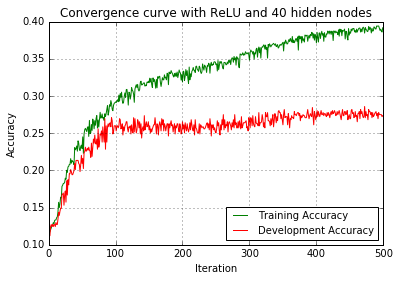

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.0054 s
Reach the maximum iteration	 73.13 s
At 485 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.520355731225
Development Accuracy:	 0.362517099863
Evaluation Accuracy:	 0.36303630363


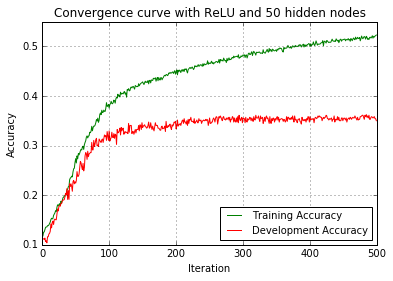

In [5]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.1, 0.1, 0.09, 0.07, 0.06]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='relu', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)
    
    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with ReLU and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Sigmoid non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.07947 s
Reach the maximum iteration	 885.85 s
At 276 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.529446640316
Development Accuracy:	 0.40902872777
Evaluation Accuracy:	 0.365236523652


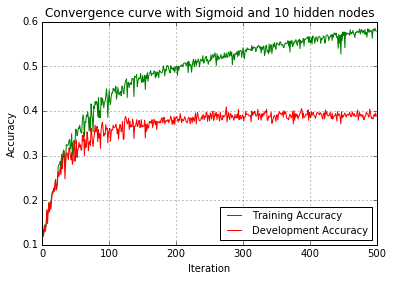

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.095 s
Reach the maximum iteration	 939.1 s
At 219 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.608102766798
Development Accuracy:	 0.462380300958
Evaluation Accuracy:	 0.42904290429


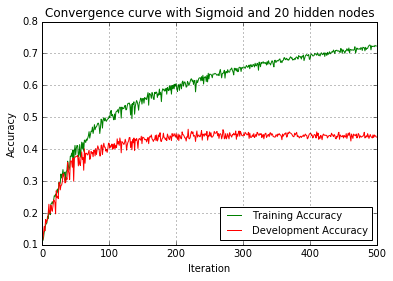

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.08449 s
Reach the maximum iteration	 983.63 s
At 156 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.634584980237
Development Accuracy:	 0.488372093023
Evaluation Accuracy:	 0.41804180418


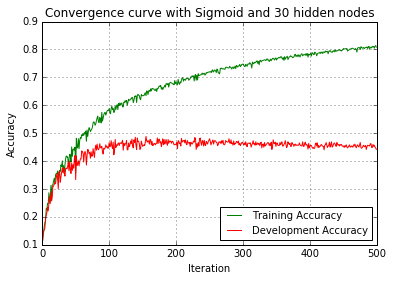

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.05928 s
Reach the maximum iteration	 1042.61 s
At 98 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.625691699605
Development Accuracy:	 0.478796169631
Evaluation Accuracy:	 0.445544554455


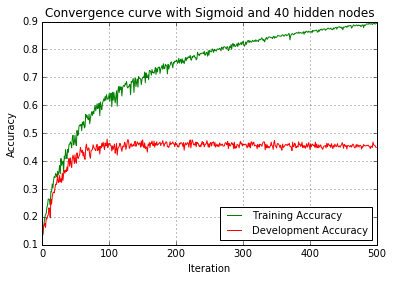

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.11694 s
Reach the maximum iteration	 1082.07 s
At 155 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.71976284585
Development Accuracy:	 0.482900136799
Evaluation Accuracy:	 0.411441144114


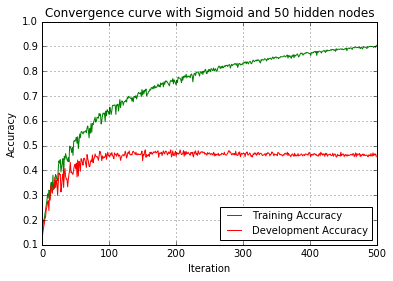

In [6]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='sigmoid', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Sigmoid and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Tanh non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.03149 s
Reach the maximum iteration	 285.16 s
At 313 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.565217391304
Development Accuracy:	 0.430916552668
Evaluation Accuracy:	 0.388338833883


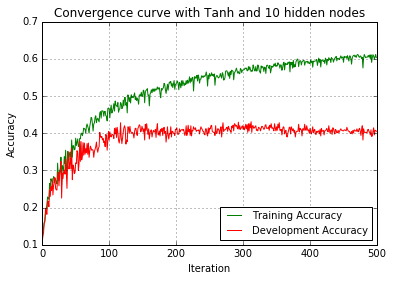

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.03188 s
Reach the maximum iteration	 309.45 s
At 281 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.74604743083
Development Accuracy:	 0.478796169631
Evaluation Accuracy:	 0.400440044004


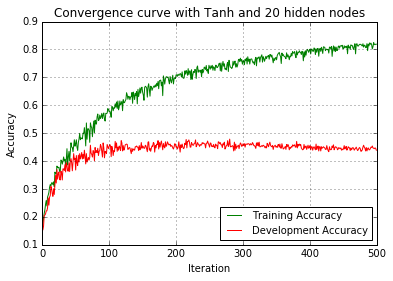

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04022 s
Reach the maximum iteration	 319.58 s
At 391 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.858498023715
Development Accuracy:	 0.447332421341
Evaluation Accuracy:	 0.371837183718


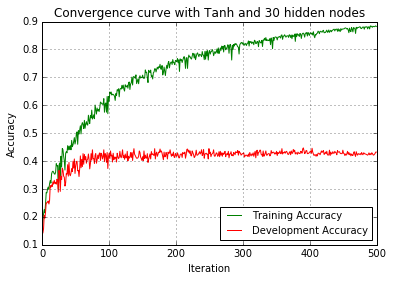

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.02708 s
Reach the maximum iteration	 337.95 s
At 135 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.723913043478
Development Accuracy:	 0.443228454172
Evaluation Accuracy:	 0.42904290429


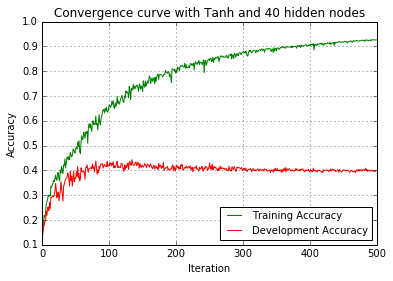

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.03835 s
Reach the maximum iteration	 383.69 s
At 208 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.825098814229
Development Accuracy:	 0.461012311902
Evaluation Accuracy:	 0.397139713971


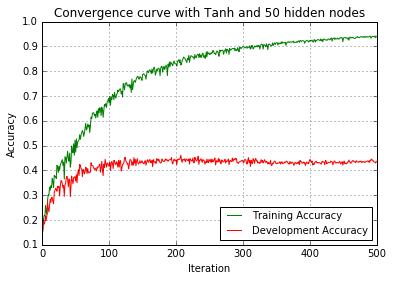

In [5]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)

    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='tanh', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Tanh and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()